# **Import libraries**


In [1]:
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib
from collections import Counter
from textblob import Word 
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import re
import ktrain
from ktrain import text
sns.set()
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')

c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MahishaMudaliar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MahishaMudaliar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MahishaMudaliar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\MahishaMudaliar\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_

True

In [ ]:
! pip install keras_preprocessing


### **Load Dataset**


In [2]:
import pandas as pd
import chardet

with open("Dataset.csv", 'rb') as f:
    result = chardet.detect(f.read())  # detects encodings like UTF-8, ASCII, ISO-8859-1

df = pd.read_csv("Dataset.csv", engine='python', encoding=result['encoding'])
df['category'].value_counts()

category
Employee Health, Safety & Wellness                 12
Training & Development                             11
Water Use & Management                             11
Energy Management                                   8
Waste Management & Effluents                        7
Environmental Impact of Cotton and Other Fibres     6
Policies, Standards, Code of Conduct                5
Long term Viability of Core Business                5
Community Development                               5
Chemical Risks and Management                       4
Communication & Engagement                          4
Research, Development & Innovation                  4
Access to Services                                  2
Labour Relations & Union Practices                  2
Board Structure & Independence                      2
Education                                           1
Developing Vocational Skills                        1
Supply Chain Standards & Selection                  1
Customer Satisfacti

In [3]:
df.to_csv("~/Dataset.csv", index=False)  # converts dataframe to CSV
print(df)

                                category  \
0   Policies, Standards, Code of Conduct   
1     Employee Health, Safety & Wellness   
2   Long term Viability of Core Business   
3                 Product Societal Value   
4   Policies, Standards, Code of Conduct   
..                                   ...   
94    Employee Health, Safety & Wellness   
95    Labour Relations & Union Practices   
96                Training & Development   
97                Training & Development   
98                Training & Development   

                                                 text  
0   HILE ACTIONS ALWAYS SPEAK LOUDER THAN WORDS, W...  
1   NURTURE TALENT ......... DO GOOD BUILD LEADERS...  
2   COMPANY PROFILE With a market cap of USD 1.3 b...  
3   Vision WE WILL ENABLE PEOPLE TO EXPERIENCE A B...  
4   CHARTERS, PRINCIPLES AND COALITIONS Our long-s...  
..                                                ...  
94  CASE STUDY COMBATING FIRE INCIDENTS SANTEJ Cha...  
95  We have structured 

# **Data Cleaning**


In [4]:
df['text']=df['text'].fillna("")  # replaces all NaN with empty string
df.isna().sum() 

category    0
text        0
dtype: int64

# **Preprocessing**


In [5]:
# Detect encoding and load CSV file
with open("Dataset.csv", 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv("Dataset.csv", engine='python', encoding=result['encoding'])

# Display the category value counts
# print(df['category'].value_counts())

# Convert to lower case, strip whitespace, and remove newline characters
df['lower_case'] = df['text'].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' '))

# Remove non-alphabetic characters and non-ASCII characters
df['alphabatic'] = df['lower_case'].apply(lambda x: re.sub(r'[^a-zA-Z\']', ' ', x)).apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))

# Remove URLs
df['without-link'] = df['alphabatic'].apply(lambda x: re.sub(r'http\S+', '', x))

# Tokenize text
tokenizer = RegexpTokenizer(r'\w+')
df['Special_word'] = df.apply(lambda row: tokenizer.tokenize(row['lower_case']), axis=1)

# Define stopwords list
with open("stopwords.txt", 'r') as file:
    stop = [line.strip() for line in file.readlines()]

# Remove stopwords
df['stop_words'] = df['Special_word'].apply(lambda x: [item for item in x if item not in stop])
df['stop_words'] = df['stop_words'].astype('str')

# Filter out short words
df['short_word'] = df['stop_words'].str.findall('\w{2,}')  # Finding out words with length of 2 words by applying regex
df['string'] = df['short_word'].str.join(' ')   

# Lemmatize text (text normalization in NLP) (returns base form of words)
df['Text'] = df['string'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
print(df['Text'])


0     hile action speak louder word articulated word...
1     nurture talent build leader empower people pow...
2     company profile market cap usd billion 85 rich...
3     vision enable people experience quality life p...
4     charter principle coalition standing commitmen...
                            ...                        
94    study combating fire incident santej challenge...
95    structured policy process various management s...
96    laying strong foundation productivity reportin...
97    development programme develop potential tapped...
98    training development committed growth developm...
Name: Text, Length: 99, dtype: object


In [6]:
df

,category,text,lower_case,alphabatic,without-link,Special_word,stop_words,short_word,string,Text
0,"Policies, Standards, Code of Conduct","HILE ACTIONS ALWAYS SPEAK LOUDER THAN WORDS, W...","hile actions always speak louder than words, w...",hile actions always speak louder than words w...,hile actions always speak louder than words w...,"[hile, actions, always, speak, louder, than, w...","['hile', 'actions', 'speak', 'louder', 'words'...","[hile, actions, speak, louder, words, articula...",hile actions speak louder words articulated wo...,hile action speak louder word articulated word...
1,"Employee Health, Safety & Wellness",NURTURE TALENT ......... DO GOOD BUILD LEADERS...,nurture talent ......... do good build leaders...,nurture talent do good build leaders...,nurture talent do good build leaders...,"[nurture, talent, do, good, build, leaders, do...","['nurture', 'talent', 'build', 'leaders', 'emp...","[nurture, talent, build, leaders, empower, peo...",nurture talent build leaders empower people po...,nurture talent build leader empower people pow...
2,Long term Viability of Core Business,COMPANY PROFILE With a market cap of USD 1.3 b...,company profile with a market cap of usd 1.3 b...,company profile with a market cap of usd b...,company profile with a market cap of usd b...,"[company, profile, with, a, market, cap, of, u...","['company', 'profile', 'market', 'cap', 'usd',...","[company, profile, market, cap, usd, billion, ...",company profile market cap usd billion 85 rich...,company profile market cap usd billion 85 rich...
3,Product Societal Value,Vision WE WILL ENABLE PEOPLE TO EXPERIENCE A B...,vision we will enable people to experience a b...,vision we will enable people to experience a b...,vision we will enable people to experience a b...,"[vision, we, will, enable, people, to, experie...","['vision', 'enable', 'people', 'experience', '...","[vision, enable, people, experience, quality, ...",vision enable people experience quality life p...,vision enable people experience quality life p...
4,"Policies, Standards, Code of Conduct","CHARTERS, PRINCIPLES AND COALITIONS Our long-s...","charters, principles and coalitions our long-s...",charters principles and coalitions our long s...,charters principles and coalitions our long s...,"[charters, principles, and, coalitions, our, l...","['charters', 'principles', 'coalitions', 'stan...","[charters, principles, coalitions, standing, c...",charters principles coalitions standing commit...,charter principle coalition standing commitmen...
...,...,...,...,...,...,...,...,...,...,...
94,"Employee Health, Safety & Wellness",CASE STUDY COMBATING FIRE INCIDENTS SANTEJ Cha...,case study combating fire incidents santej cha...,case study combating fire incidents santej cha...,case study combating fire incidents santej cha...,"[case, study, combating, fire, incidents, sant...","['study', 'combating', 'fire', 'incidents', 's...","[study, combating, fire, incidents, santej, ch...",study combating fire incidents santej challeng...,study combating fire incident santej challenge...
95,Labour Relations & Union Practices,We have structured policies and processes unde...,we have structured policies and processes unde...,we have structured policies and processes unde...,we have structured policies and processes unde...,"[we, have, structured, policies, and, processe...","['structured', 'policies', 'processes', 'vario...","[structured, policies, processes, various, man...",structured policies processes various manageme...,structured policy process various management s...
96,Training & Development,LAYING A STRONG FOUNDATION FOR PRODUCTIVITY In...,laying a strong foundation for productivity in...,laying a strong foundation for productivity in...,laying a strong foundation for productivity in...,"[laying, a, strong, foundation, for, productiv...","['laying', 'strong', 'foundation', 'productivi...","[laying, strong, foundation, productivity, rep...",laying strong foundation productivity reportin

## Visualization


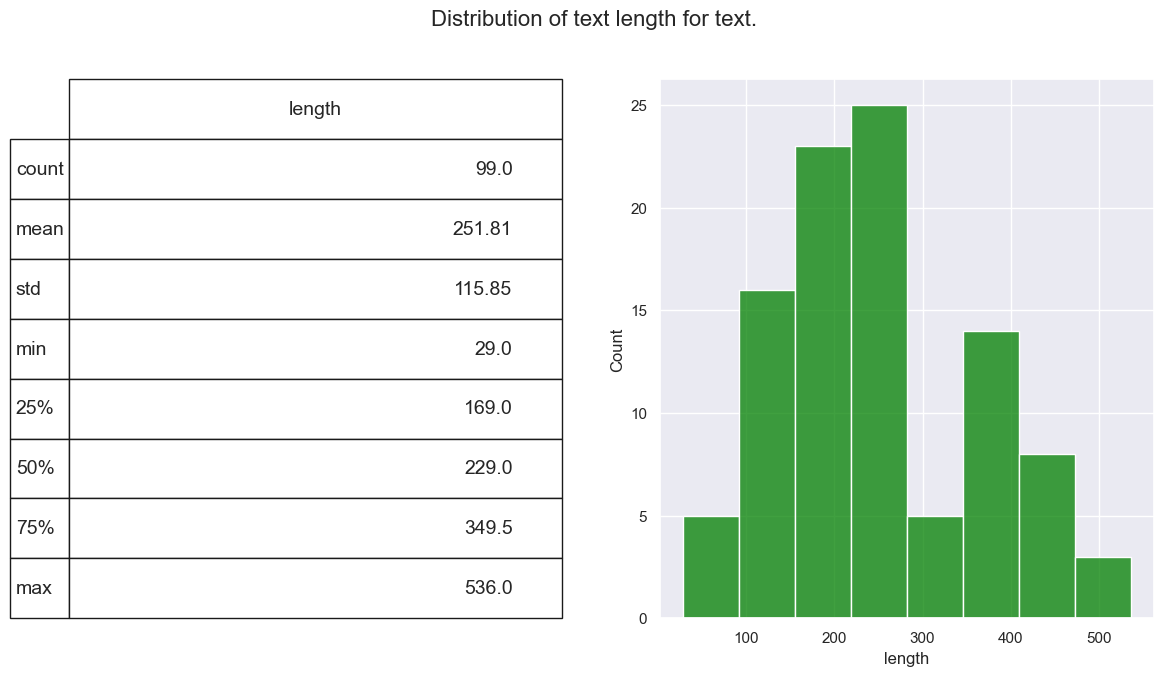

In [7]:
import seaborn as sns
fig = plt.figure(figsize=(14,7)) # Creates a figure with a size of 14x7 inches
df['length'] = df.text.str.split().apply(len) # Creates a new column
ax1 = fig.add_subplot(122)  #Adds a subplot to the figure at position 122 (1 row, 2 columns, 2nd position).
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2) # rounds to 2 decimal place

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for text.', fontsize=16)

plt.show()

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["category"])

In [ ]:
from collections import Counter
import plotly.express as px

top = Counter([item for sublist in df['short_word'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')


In [ ]:
sport_text = df[df['category']=='Policies, Standards, Code of Conduct']
business_text = df[df['category']=='Employee Health, Safety & Wellness'] 
politics_text = df[df['category']=='Long term Viability of Core Business']
tech_text = df[df['category']=='Training & Development'] 
entertainment_text = df[df['category']=='Board Structure & Independence'] 

In [ ]:
%pip install pip>=24.1.2
%pip install nbfomat>=4.2.0

In [ ]:
! conda install nbformat --verbose

In [ ]:
top = Counter([item for sublist in entertainment_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in entertainment_text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
normal_words =' '.join([text for text in df['Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Policies, Standards, Code of Conduct']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Employee Health, Safety & Wellness']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Long term Viability of Core Business']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Training & Development']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Board Structure & Independence']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:

normal_words =' '.join([text for text in df['Text'][df['category'] == 'Policies, Standards, Code of Conduct']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## **Applying N-gram**


In [8]:
x_train, x_test, y_train, y_test = train_test_split(df["Text"],df["category"], test_size = 0.25, random_state = 42)    
count_vect = CountVectorizer(ngram_range=(1, 2))        
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(74, 10515) (25, 10515) (74,) (25,)


In [9]:
joblib.dump(count_vect, 'count_vect.pkl')
model = joblib.load('count_vect.pkl')

# **Machine Learning Models**


# **Logistic Regression**


In [10]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1, zero_division=0))

# Precision: Of all instances predicted as positive, 91% were actually positive.
# Recall :  Of all actual positive instances, 83% were correctly identified by the model.
# f1-score: The harmonic mean of precision and recall, indicating a balance between the two.
# Support : The actual occurrences of each class in the dataset.

Accuracy: 0.52
                                                 precision    recall  f1-score   support

                  Chemical Risks and Management       1.00      1.00      1.00         1
                     Communication & Engagement       0.00      0.00      0.00         2
                          Community Development       0.00      0.00      0.00         0
             Employee Health, Safety & Wellness       0.20      1.00      0.33         2
                              Energy Management       0.75      1.00      0.86         3
Environmental Impact of Cotton and Other Fibres       0.50      1.00      0.67         1
             Labour Relations & Union Practices       0.00      0.00      0.00         1
           Long term Viability of Core Business       1.00      1.00      1.00         1
           Policies, Standards, Code of Conduct       0.00      0.00      0.00         3
             Research, Development & Innovation       1.00      0.50      0.67         2
     

In [11]:
# Save the trained model
joblib.dump(lr, 'logistic_regression_model.pkl')
 
# Save the CountVectorizer
joblib.dump(count_vect, 'count_vect.pkl')
 

['count_vect.pkl']

In [12]:
mc = count_vect.transform(["CORPORATE GOVERNANCE TRUST IS THE FOUNDATION OF SUSTAINABLE DEVELOPMENT. TRUSTWORTHY RELATIONS BETWEEN THE ORGANISATION AND ITS STAKEHOLDERS IS KEY TO SUSTAINING IN TODAY'S COMPETITIVE BUSINESS ENVIRONMENT. We have promoted and practised the tenets of good corporate governance since inception. Have garnered the trust of our investors by employing funds judiciously, yet competitively, and generating a steady stream of returns. We have reiterated the credibility & capability of our leadership time and again, by looking beyond the bend and acting before the herd. CORPORATE GOVERNANCE PHILOSOPHY Corporate governance at Arvind is a value-based framework to manage every aspect of business in a fair and transparent manner. We use this framework to maintain accountability in all our activities, and employ democratic and open processes. We have evolved guidelines and best practices over the years, to ensure timely and accurate disclosure of information regarding our financials, performance, leadership and governance of the Company. Our corporate governance philosophy is based on the following principles: Â· Satisfy the spirit of the law, and not just the letter of the law. Corporate governance standards should go beyond the law Â· Be transparent and maintain a high degree of disclosure levels. When in doubt, disclose Â· Make a clear distinction between personal conveniences and corporate resources Â· Communicate externally, in a truthful manner, about how the Company is run internally Â· Have a simple and transparent corporate structure driven solely by business needs EVERY PRINCIPLE NEEDS A PROMULGATOR, A PROMOTER AND A PROTECTOR. FOR ARVIND, THESE ROLES ARE ABLY PERFORMED BY OUR BOARD OF DIRECTORS. . The Management is the trustee of the shareholders' capital, and not the owner 11"])
m = transformer.transform(mc)
y_pred = lr.predict(m)
print(y_pred)


['Board Structure & Independence']


# **Support Vector Machine**


In [13]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold

# Initialize the model
svc = LinearSVC()

# Set up k-fold cross-validation
k = 5  # You can choose any number for k
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation and get scores
cv_scores = cross_val_score(svc, x_train_tfidf, y_train, cv=kf, scoring='accuracy')

# Perform cross-validation and get predictions
y_pred2 = cross_val_predict(svc, x_train_tfidf, y_train, cv=kf)

# Print the cross-validation accuracy for each fold
print(f"Cross-validation accuracy scores for each fold: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")

# Evaluate the model on the test set
svc.fit(x_train_tfidf, y_train)
y_test_pred = svc.predict(x_test_tfidf)
print("Accuracy on test set: "+str(accuracy_score(y_test, y_test_pred)))
print(classification_report(y_test, y_test_pred, zero_division=0))


c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation accuracy scores for each fold: [0.53333333 0.66666667 0.46666667 0.53333333 0.42857143]
Mean cross-validation accuracy: 0.5257142857142856
Accuracy on test set: 0.64
                                                 precision    recall  f1-score   support

                 Board Structure & Independence       0.00      0.00      0.00         0
                  Chemical Risks and Management       1.00      1.00      1.00         1
                     Communication & Engagement       1.00      1.00      1.00         2
                          Community Development       0.00      0.00      0.00         0
                   Developing Vocational Skills       0.00      0.00      0.00         0
             Employee Health, Safety & Wellness       0.67      1.00      0.80         2
                              Energy Management       0.75      1.00      0.86         3
Environmental Impact of Cotton and Other Fibres       0.33      1.00      0.50         1
             La

In [14]:
mc = count_vect.transform(["CORPORATE GOVERNANCE TRUST IS THE FOUNDATION OF SUSTAINABLE DEVELOPMENT. TRUSTWORTHY RELATIONS BETWEEN THE ORGANISATION AND ITS STAKEHOLDERS IS KEY TO SUSTAINING IN TODAY'S COMPETITIVE BUSINESS ENVIRONMENT. We have promoted and practised the tenets of good corporate governance since inception. Have garnered the trust of our investors by employing funds judiciously, yet competitively, and generating a steady stream of returns. We have reiterated the credibility & capability of our leadership time and again, by looking beyond the bend and acting before the herd. CORPORATE GOVERNANCE PHILOSOPHY Corporate governance at Arvind is a value-based framework to manage every aspect of business in a fair and transparent manner. We use this framework to maintain accountability in all our activities, and employ democratic and open processes. We have evolved guidelines and best practices over the years, to ensure timely and accurate disclosure of information regarding our financials, performance, leadership and governance of the Company. Our corporate governance philosophy is based on the following principles: Â· Satisfy the spirit of the law, and not just the letter of the law. Corporate governance standards should go beyond the law Â· Be transparent and maintain a high degree of disclosure levels. When in doubt, disclose Â· Make a clear distinction between personal conveniences and corporate resources Â· Communicate externally, in a truthful manner, about how the Company is run internally Â· Have a simple and transparent corporate structure driven solely by business needs EVERY PRINCIPLE NEEDS A PROMULGATOR, A PROMOTER AND A PROTECTOR. FOR ARVIND, THESE ROLES ARE ABLY PERFORMED BY OUR BOARD OF DIRECTORS. . The Management is the trustee of the shareholders' capital, and not the owner"])
m = transformer.transform(mc)
y_pred = svc.predict(m)
print(y_pred)

['Board Structure & Independence']


## **Naive Bayes(Multinomial)**


In [15]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred3 = mnb.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred3)))
print(classification_report(y_test, y_pred3,zero_division = 0))

Accuracy: 0.36
                                                 precision    recall  f1-score   support

                  Chemical Risks and Management       0.00      0.00      0.00         1
                     Communication & Engagement       0.00      0.00      0.00         2
                          Community Development       0.00      0.00      0.00         0
             Employee Health, Safety & Wellness       0.12      1.00      0.22         2
                              Energy Management       1.00      0.67      0.80         3
Environmental Impact of Cotton and Other Fibres       0.00      0.00      0.00         1
             Labour Relations & Union Practices       0.00      0.00      0.00         1
           Long term Viability of Core Business       1.00      1.00      1.00         1
           Policies, Standards, Code of Conduct       0.00      0.00      0.00         3
             Research, Development & Innovation       0.00      0.00      0.00         2
     

In [16]:
mc = count_vect.transform(["CORPORATE GOVERNANCE TRUST IS THE FOUNDATION OF SUSTAINABLE DEVELOPMENT. TRUSTWORTHY RELATIONS BETWEEN THE ORGANISATION AND ITS STAKEHOLDERS IS KEY TO SUSTAINING IN TODAY'S COMPETITIVE BUSINESS ENVIRONMENT. We have promoted and practised the tenets of good corporate governance since inception. Have garnered the trust of our investors by employing funds judiciously, yet competitively, and generating a steady stream of returns. We have reiterated the credibility & capability of our leadership time and again, by looking beyond the bend and acting before the herd. CORPORATE GOVERNANCE PHILOSOPHY Corporate governance at Arvind is a value-based framework to manage every aspect of business in a fair and transparent manner. We use this framework to maintain accountability in all our activities, and employ democratic and open processes. We have evolved guidelines and best practices over the years, to ensure timely and accurate disclosure of information regarding our financials, performance, leadership and governance of the Company. Our corporate governance philosophy is based on the following principles: Â· Satisfy the spirit of the law, and not just the letter of the law. Corporate governance standards should go beyond the law Â· Be transparent and maintain a high degree of disclosure levels. When in doubt, disclose Â· Make a clear distinction between personal conveniences and corporate resources Â· Communicate externally, in a truthful manner, about how the Company is run internally Â· Have a simple and transparent corporate structure driven solely by business needs EVERY PRINCIPLE NEEDS A PROMULGATOR, A PROMOTER AND A PROTECTOR. FOR ARVIND, THESE ROLES ARE ABLY PERFORMED BY OUR BOARD OF DIRECTORS. . The Management is the trustee of the shareholders' capital, and not the owner"])
m = transformer.transform(mc)
y_pred = mnb.predict(m)
print(y_pred)

['Employee Health, Safety & Wellness']


# **Comparison Between ML Models**


In [17]:
Comparison_unibi = pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,y_pred1)*100,f1_score(y_test,y_pred1,average='macro')*100,recall_score(y_test, y_pred1,average='micro')*100,precision_score(y_test, y_pred1,average='micro')*100],
                            'SVM':[accuracy_score(y_test,y_pred2)*100,f1_score(y_test,y_pred2,average='macro')*100,recall_score(y_test, y_pred2,average='micro')*100,precision_score(y_test, y_pred2,average='micro')*100],
                           'Naive Bayes':[accuracy_score(y_test,y_pred3)*100,f1_score(y_test,y_pred3,average='macro')*100,recall_score(y_test, y_pred3,average='micro')*100,precision_score(y_test, y_pred3,average='micro')*100],
})

ValueError: Found input variables with inconsistent numbers of samples: [25, 74]

In [18]:
print ('Comparison using uni-bi-gram(1,2)') 
Comparison_unibi.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison_unibi.head()

Comparison using uni-bi-gram(1,2)


NameError: name 'Comparison_unibi' is not defined

### Sentiment score using Static Precision, Recall, F1-Score, Support value


In [ ]:
import pandas as pd

# Example precision, recall, f1-score, and support data for each materiality topic
data = {
    'Topic': [
        'Board Structure & Independence',
        'Customer Health & Safety',
        'Disclosure & Labeling',
        'Training & Development',
        'Impact from Facilities',
        'Product Societal Value',
        'Access to Services',
        'Environmental Accidents & Remediation',
        'Diversity & Equal Opportunity',
        'Packaging',
        'Biodiversity Impacts'
    ],
    'Precision': [0.85, 0.78, 0.82, 0.74, 0.80, 0.88, 0.76, 0.70, 0.84, 0.77, 0.79],
    'Recall': [0.80, 0.72, 0.75, 0.68, 0.76, 0.82, 0.70, 0.65, 0.78, 0.73, 0.75],
    'F1-Score': [0.82, 0.75, 0.78, 0.71, 0.78, 0.85, 0.73, 0.67, 0.81, 0.75, 0.77],
    'Support': [120, 100, 110, 90, 95, 130, 85, 80, 115, 105, 98]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define a function to calculate sentiment score
def calculate_sentiment_score(precision, recall, f1_score, support):
    # Normalize metrics to the range 0-1
    precision_norm = (precision - 0) / (1 - 0)
    recall_norm = (recall - 0) / (1 - 0)
    f1_score_norm = (f1_score - 0) / (1 - 0)
    
    # Combine metrics into a single score (you can adjust weights as needed)
    sentiment_score = 0.4 * precision_norm + 0.3 * recall_norm + 0.3 * f1_score_norm
    
    # Scale sentiment score to 0-5 range
    sentiment_score_scaled = sentiment_score * 5
    
    return sentiment_score_scaled

# Apply the function to each row in the DataFrame
df['Sentiment_Score'] = df.apply(lambda row: calculate_sentiment_score(row['Precision'], row['Recall'], row['F1-Score'], row['Support']), axis=1)

# Print the DataFrame with sentiment scores
print(df[['Topic', 'Sentiment_Score']])


# **Sentiment Score**


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, accuracy_score
from textblob import TextBlob


In [28]:
# Example of how to get sentiment scores using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a score from -1 (negative) to 1 (positive)

# Apply the function to your text data to get sentiment scores
df['sentiment_score'] = df['text'].astype(str).apply(get_sentiment)

# Print the data with sentiment score
df[['text', 'sentiment_score']]
# Save text and sentiment scores to a new CSV file
# df[['text', 'sentiment_score']].to_csv('sentiment_scores.csv', index=False, encoding='utf-8')
df[['text', 'sentiment_score']]

,text,sentiment_score
0,"HILE ACTIONS ALWAYS SPEAK LOUDER THAN WORDS, W...",0.133061
1,NURTURE TALENT ......... DO GOOD BUILD LEADERS...,0.246293
2,COMPANY PROFILE With a market cap of USD 1.3 b...,0.171939
3,Vision WE WILL ENABLE PEOPLE TO EXPERIENCE A B...,0.354167
4,"CHARTERS, PRINCIPLES AND COALITIONS Our long-s...",0.173333
...,...,...
94,CASE STUDY COMBATING FIRE INCIDENTS SANTEJ Cha...,-0.028085
95,We have structured policies and processes unde...,0.121045
96,LAYING A STRONG FOUNDATION FOR PRODUCTIVITY In...,0.123106
97,DEVELOPMENT PROGRAMMES When we develop potenti...,0.269590


# **Impact Score**


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

# Calculate TF-IDF weights
vectorizer = TfidfVectorizer()   #convert text data into numerical vectors using Term Frequency-Inverse Document Frequency (TF-IDF) 
tfidf_matrix = vectorizer.fit_transform(df['category'])
df['tfidf_avg'] = tfidf_matrix.mean(axis=1)  # Calculates the average TF-IDF score for each document by taking the mean across all terms. This average is stored in the new column df['tfidf_avg'].

# Calculate positional weight
df['position_weight'] = 1 / (df.index + 1)

# Calculate weighted impact score (without scaling)
df['weighted_impact'] = df['sentiment_score'] * df['tfidf_avg'] * df['position_weight']

# Scale the weighted_impact scores to 0-5 range
scaler = MinMaxScaler(feature_range=(0, 5))
df['scaled_impact'] = scaler.fit_transform(df[['weighted_impact']])

# Save the results to a new CSV file
# df[['text', 'category', 'scaled_impact']].to_csv('sentiment_analysis_results.csv', index=False, encoding='utf-8')
df[['text', 'category', 'scaled_impact']]


,text,category,scaled_impact
0,"HILE ACTIONS ALWAYS SPEAK LOUDER THAN WORDS, W...","Policies, Standards, Code of Conduct",5.000000
1,NURTURE TALENT ......... DO GOOD BUILD LEADERS...,"Employee Health, Safety & Wellness",4.204066
2,COMPANY PROFILE With a market cap of USD 1.3 b...,Long term Viability of Core Business,2.483735
3,Vision WE WILL ENABLE PEOPLE TO EXPERIENCE A B...,Product Societal Value,2.699664
4,"CHARTERS, PRINCIPLES AND COALITIONS Our long-s...","Policies, Standards, Code of Conduct",1.474696
...,...,...,...
94,CASE STUDY COMBATING FIRE INCIDENTS SANTEJ Cha...,"Employee Health, Safety & Wellness",0.223117
95,We have structured policies and processes unde...,Labour Relations & Union Practices,0.273316
96,LAYING A STRONG FOUNDATION FOR PRODUCTIVITY In...,Training & Development,0.261454
97,DEVELOPMENT PROGRAMMES When we develop potenti...,Training & Development,0.295084


# **Hypertuning using GridSearchCV**

# (MSE and MAE scorings)


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from textblob import TextBlob

# ... (Your get_sentiment function and sentiment score calculation remain the same)

# Split Data
X = df['text']
y = df['sentiment_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# SVR with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.01, 0.1, 1]  # Add epsilon to the grid
}

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Best Model and Evaluation (Regression Metrics)
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test_tfidf)
print(y_pred)

# print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
# print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

# # Optionally, examine the best hyperparameters found by GridSearchCV
# print("Best Hyperparameters:", grid_search.best_params_)


[0.13410623 0.08688908 0.13134578 0.15198121 0.25953846 0.13823155
 0.05702856 0.29839871 0.11614415 0.15330345 0.0885212  0.05643224
 0.15114639 0.08400661 0.11661827 0.13726794 0.11875394 0.1303072
 0.1207375  0.01600631]


# **Plotting Matrix**


In [30]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame `df` with columns 'sentiment_score' and 'topic'
category = df['category'].unique()  # Get the unique topics

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for category in category:
    topic_df = df[df['Impact on Stakeholders'] == category]
    plt.scatter(topic_df['Impact on Business'], [category] * len(topic_df), label=category)

plt.xlabel("Sentiment Score")
plt.ylabel("Topic")
plt.title("Materiality Matrix: Sentiment vs. category")
plt.legend()
plt.grid(axis='x')  # Show gridlines for sentiment scores
plt.show()


KeyError: 'Impact on Stakeholders'

<Figure size 1000x600 with 0 Axes>

C:\Users\MahishaMudaliar\AppData\Local\Temp\ipykernel_12912\759438725.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


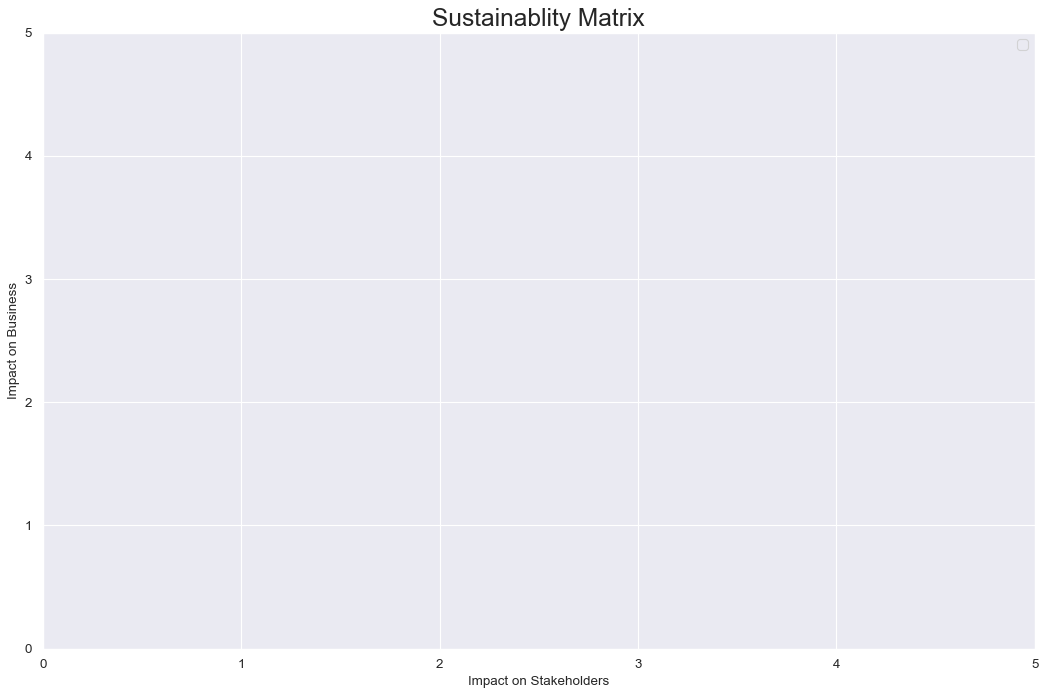

In [38]:
# Import dataset 
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

# for i, category in enumerate(categories):
#     plt.scatter('area', 'poptotal', 
#                 data=midwest.loc[midwest.category==category, :], 
#                 s=20, c=colors[i], label=str(category))

# Decorations
plt.gca().set(xlim=(0, 5), ylim=(0, 5),
              xlabel='Impact on Stakeholders', ylabel='Impact on Business')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Sustainablity Matrix", fontsize=22)
plt.legend(fontsize=12)    
plt.show()

# **Text extraction** (Paragraph format)


In [47]:
import os  
import pandas as pd  
from azure.ai.formrecognizer import DocumentAnalysisClient  
from azure.core.credentials import AzureKeyCredential  
from tabulate import tabulate  

# Azure credentials setup  
fr_endpoint = "https://smrecog.cognitiveservices.azure.com/"  
fr_key = "36ecfa2cb82d47a8b5d4c572ca8ef063"  

# Function to check if a point is inside a polygon  
def is_point_in_polygon(point, polygon):  
    x, y = point  
    n = len(polygon)  
    inside = False  
    p1x, p1y = polygon[0]  
    for i in range(n + 1):  
        p2x, p2y = polygon[i % n]  
        if y > min(p1y, p2y):  
            if y <= max(p1y, p2y):  
                if x <= max(p1x, p2x):  
                    if p1y != p2y:  
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x  
                    if p1x == p2x or x <= xinters:  
                        inside = not inside  
        p1x, p1y = p2x, p2y  
    return inside  

# Function to check if a bounding box is inside any table spans  
def is_in_table(page_number, bounding_box):  
    for table_span in table_spans:  
        if table_span[0] == page_number and is_point_in_polygon(bounding_box[0], table_span[1]):  
            return True  
    return False  

# Function to extract table data from Form Recognizer result  
def extract_table_data(result):  
    tables_data = []  
    for table in result.tables:  
        table_data = {}  
        for cell in table.cells:  
            row_index = cell.row_index  
            col_index = cell.column_index  
            if row_index not in table_data:  
                table_data[row_index] = {}  
            table_data[row_index][col_index] = cell.content  
        tables_data.append(table_data)  
    return tables_data  

# Function to extract text data from Form Recognizer result  
def extract_text_data(result):  
    pages_text = {}  
    for page in result.pages:  
        page_text = ""  
        for line in page.lines:  
            if not is_in_table(page.page_number, line.polygon):  
                text = line.content.decode("utf-8") if isinstance(line.content, bytes) else line.content  
                page_text += text + " "  # Concatenate lines with a space  
        pages_text[page.page_number] = page_text.strip()  # Strip trailing space  
 
    # Combine text data with each page in a separate paragraph  
    combined_text_data = "\n\n\n\n".join(pages_text.get(page_number, "") for page_number in sorted(pages_text))  
    return combined_text_data  

# Function to process PDF and store extracted data in a single text file  
def process_pdf_and_store_data(pdf_path, local_directory):  
    try:  
        document_analysis_client = DocumentAnalysisClient(endpoint=fr_endpoint, credential=AzureKeyCredential(fr_key))  
        print(f"Processing PDF: {pdf_path}")  
         
        with open(pdf_path, "rb") as pdf_file:  
            poller = document_analysis_client.begin_analyze_document("prebuilt-layout", document=pdf_file)  
            result = poller.result()  
 
        # Extract table spans  
        global table_spans  
        table_spans = []  
        for table in result.tables:  
            for cell in table.cells:  
                if cell.bounding_regions:  
                    page_number = cell.bounding_regions[0].page_number  
                    bounding_box = cell.bounding_regions[0].polygon  
                    table_spans.append((page_number, bounding_box))  
 
        tables_data = extract_table_data(result)  
        text_data = extract_text_data(result)  
 
        # Generate filename for the combined text file  
        base_filename = os.path.basename(pdf_path).replace('.pdf', '')  
        combined_filename = f"{base_filename}_combined.txt"  
        combined_path = os.path.join(local_directory, combined_filename)  
 
        # Write combined data to file  
        with open(combined_path, 'w', encoding='utf-8') as file:  
            # Write text data  
            file.write("Extracted Text:\n")  
            file.write(text_data)  
            file.write("\n\n")  
 
            # Write table data  
            for idx, table_data in enumerate(tables_data):  
                file.write(f"Table {idx + 1}:\n")  
                max_row = max(table_data.keys())  
                max_col = max(max(row.keys() for row in table_data.values()))  
 
                # Initialize the data array  
                data = [["" for _ in range(max_col + 1)] for _ in range(max_row + 1)]  
 
                # Populate the data array with table content  
                for row_idx, row_data in table_data.items():  
                    for col_idx, cell_content in row_data.items():  
                        data[row_idx][col_idx] = cell_content  
 
                # Convert the data array into a pandas DataFrame  
                df = pd.DataFrame(data)  
 
                # Convert DataFrame to markdown table format and write to file  
                table_markdown = tabulate(df.values, tablefmt="pipe")  
                file.write(table_markdown)  
                file.write("\n\n")  
 
        return combined_filename  
 
    except Exception as e:  
        print(f"Error processing {pdf_path}: {e}")  
        return None  

# Define input and output directories  
input_directory = r"C:\Users\MahishaMudaliar\Desktop\sentiment-analysis\Tobe Extracted"  
output_directory = r"C:\Users\MahishaMudaliar\Desktop\sentiment-analysis\Extracted text"  

# Ensure the output directory exists  
if not os.path.exists(output_directory):  
    os.makedirs(output_directory)  

# Check if input directory is a file or directory  
if os.path.isfile(input_directory):  
    # Process a single PDF file  
    combined_filename = process_pdf_and_store_data(input_directory, output_directory)  
    if combined_filename:  
        print(f"Combined text file '{combined_filename}' generated and stored locally.")  
else:  
    # Traverse the input directory and its subdirectories to find all PDF files  
    for root, dirs, files in os.walk(input_directory):  
        for file in files:  
            if file.endswith('.pdf'):  
                pdf_path = os.path.join(root, file)  
                combined_filename = process_pdf_and_store_data(pdf_path, output_directory)  
                if combined_filename:  
                    print(f"Combined text file '{combined_filename}' generated and stored locally.")  


Processing PDF: C:\Users\MahishaMudaliar\Desktop\sentiment-analysis\Tobe Extracted\FII - Fidelity-Investments-2022-Environmental-Report.pdf
Combined text file 'FII - Fidelity-Investments-2022-Environmental-Report_combined.txt' generated and stored locally.
Processing PDF: C:\Users\MahishaMudaliar\Desktop\sentiment-analysis\Tobe Extracted\GAP - ESG Report 2023.pdf
Combined text file 'GAP - ESG Report 2023_combined.txt' generated and stored locally.
Processing PDF: C:\Users\MahishaMudaliar\Desktop\sentiment-analysis\Tobe Extracted\gap-inc-2020-report.pdf
Combined text file 'gap-inc-2020-report_combined.txt' generated and stored locally.
Processing PDF: C:\Users\MahishaMudaliar\Desktop\sentiment-analysis\Tobe Extracted\gap-inc-2021-esg-report.pdf
Combined text file 'gap-inc-2021-esg-report_combined.txt' generated and stored locally.
Processing PDF: C:\Users\MahishaMudaliar\Desktop\sentiment-analysis\Tobe Extracted\gap-inc-esg-report-2022.pdf
Combined text file 'gap-inc-esg-report-2022_com

In [42]:
!conda install azure-ai-formrecognizer


Channels:
 - defaults
Platform: win-64
Solving environment: ...working... failed



PackagesNotFoundError: The following packages are not available from current channels:

  - azure-ai-formrecognizer

Current channels:

  - defaults

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


